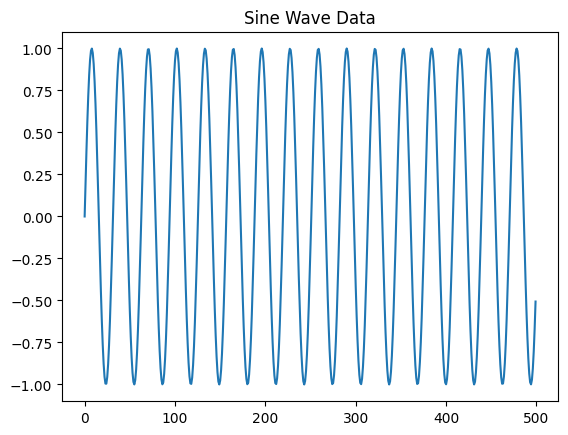

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.3440 - val_loss: 0.0025
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0120 - val_loss: 0.0032
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0014 - val_loss: 3.1339e-04
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.2396e-04 - val_loss: 1.5544e-05
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.0159e-05 - val_loss: 7.4403e-06
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.0978e-06 - val_loss: 4.4010e-06
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.4313e-06 - val_loss: 4.0747e-06
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.4132e-06 - val_loss: 3.8331e-06
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.7823e-06 - val_loss: 3.0315e-06
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.2139e-06 - val_loss: 3.0792e-06
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.9826e-06 - val_loss: 2.7988e-06

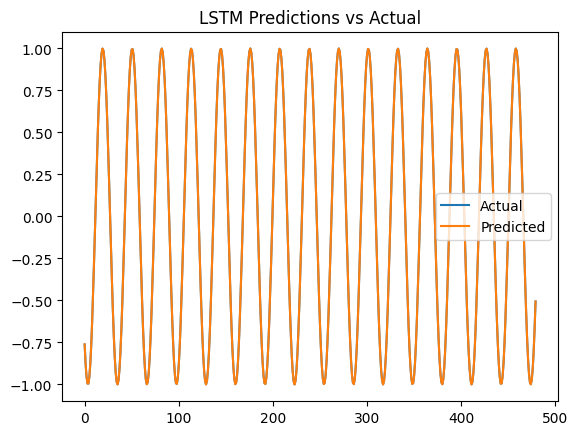

In [ ]:
000# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense




# Generate sample data (sine wave)
time_steps = np.linspace(0, 100, 500)  # 500 points
data = np.sin(time_steps)

plt.plot(data)
plt.title("Sine Wave Data")
plt.show()



# Prepare sequences for LSTM
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 20  # number of previous steps to predict next step
X, y = create_sequences(data, seq_length)


# Reshape X to (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))



# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='tanh', input_shape=(seq_length, 1)))
model.add(Dense(1))  # predict single value
model.compile(optimizer='adam', loss='mse')

model.summary()



# Train the model
history = model.fit(X, y, epochs=50, batch_size=16, validation_split=0.2)



# Predict
predictions = model.predict(X)



# Visualize predictions vs actual
plt.plot(y, label="Actual")
plt.plot(predictions, label="Predicted")
plt.title("LSTM Predictions vs Actual")
plt.legend()
plt.show()


Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.2947e-07 - val_loss: 1.2962e-07
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.2296e-07 - val_loss: 1.1431e-07
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.2012e-07 - val_loss: 1.6900e-07
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.1028e-07 - val_loss: 2.5104e-07
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.9300e-07 - val_loss: 1.0303e-07
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.4733e-07 - val_loss: 1.7330e-07
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0399e-07 - val_loss: 1.1106e-07
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.2086e-07 - val_loss: 1.9310e-07
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.6596e-07 - val_loss: 1.4496e-07
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.3003e-07 - val_loss: 1.0950e-07
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1090e-07 

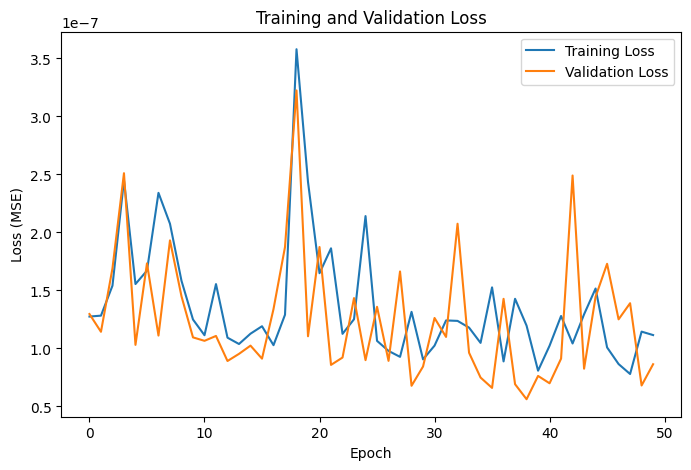

In [ ]:
# Train the model
history = model.fit(X, y, epochs=50, batch_size=16, validation_split=0.2)

# Plot training & validation loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()
